In [54]:
import pandas as pd

data = {
    'Name': [
        'Paul', 'Monica', 'Lee', 'Eve', 'Fred', 'Irene', 'James', 'Lea',
        'Mary', 'Peter', 'Mary', 'Louis', 'Jonathan', 'Levy', 'Joseph',
        'Omar', 'Lisa', 'Elizabeth', 'Taylor', 'Yves'
    ],
    'Age': [
        48, 43, 82, 23, 46, 29, 42, 38, 31, 41, 43, 82, 23, 46, 17, 42, 38, 31, 46, 29
    ],
    'Education level': [
        1.0, 2.0, 3.0, 3.0, 5.0, 4.5, 4.1, 5.0, 3.0, 1.0, 2.0, 3.0, 3.5, 5.0,
        4.0, 4.0, 4.0, 2.0, 5.0, 4.0
    ],
    'Company': [
        'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
        'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
        'Good', 'Bad'
    ]
}

df = pd.DataFrame(data)
print(df)


         Name  Age  Education level Company
0        Paul   48              1.0     Bad
1      Monica   43              2.0    Good
2         Lee   82              3.0     Bad
3         Eve   23              3.0     Bad
4        Fred   46              5.0    Good
5       Irene   29              4.5     Bad
6       James   42              4.1    Good
7         Lea   38              5.0     Bad
8        Mary   31              3.0    Good
9       Peter   41              1.0    Good
10       Mary   43              2.0    Good
11      Louis   82              3.0    Good
12   Jonathan   23              3.5     Bad
13       Levy   46              5.0    Good
14     Joseph   17              4.0     Bad
15       Omar   42              4.0    Good
16       Lisa   38              4.0     Bad
17  Elizabeth   31              2.0    Good
18     Taylor   46              5.0    Good
19       Yves   29              4.0     Bad


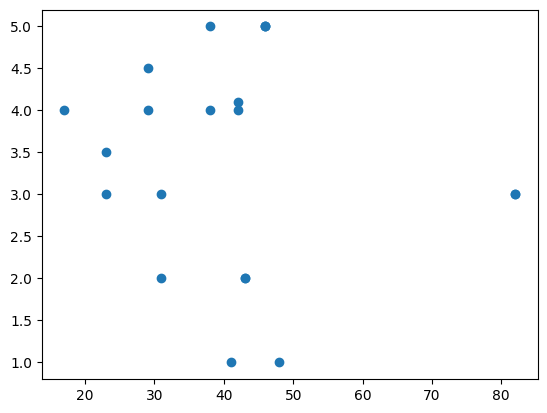

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Education level'])
plt.show()

**Kmeans**

Let's apply this clustering technique. First we utilize the elbow method to calculate visualize the inertia for different values of K

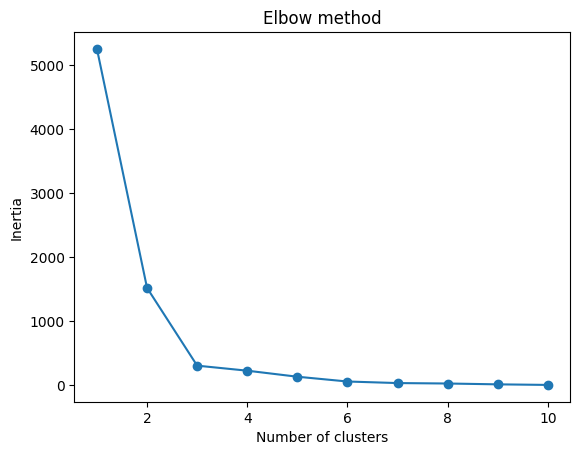

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
from sklearn.cluster import KMeans

data = list(zip(df['Age'], df['Education level']))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Ok so we will experiment with the K-values 2 and 3 (and also 5 just to put the things extreme and see what happens)

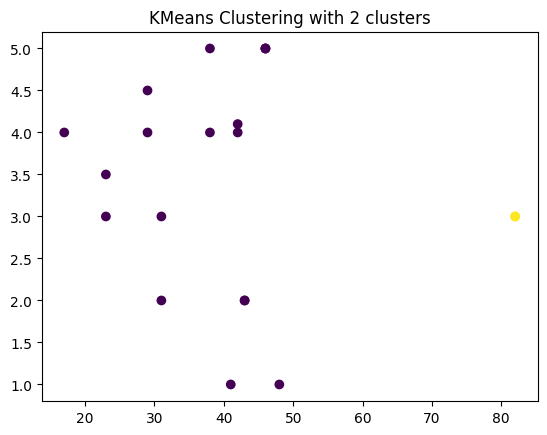

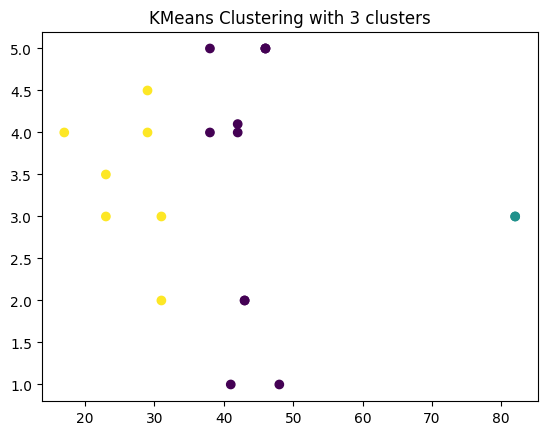

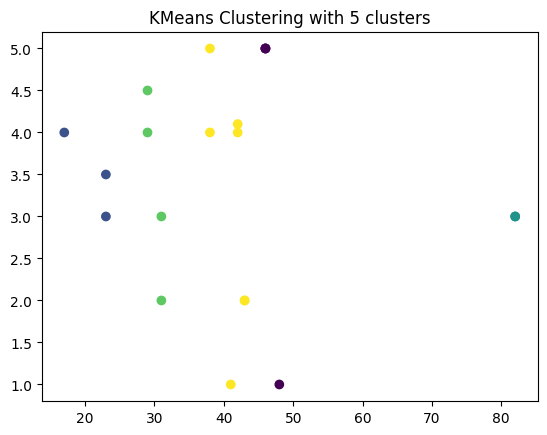

In [57]:
def kmeans_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    
    plt.title(f'KMeans Clustering with {n_clusters} clusters')
    plt.scatter(df['Age'], df['Education level'], c=kmeans.labels_)
    plt.show()

kmeans_clustering(2)
kmeans_clustering(3)
kmeans_clustering(5)



The result above seems to indicate that the best k-value is 3, where the yellow point could be a potential outlier.

**DBSCAN**

Let's test this other method. For the sake of testing we will use different hyperparameters: 6, 7, 8. We will see that eps = 7 is the optimal parameter

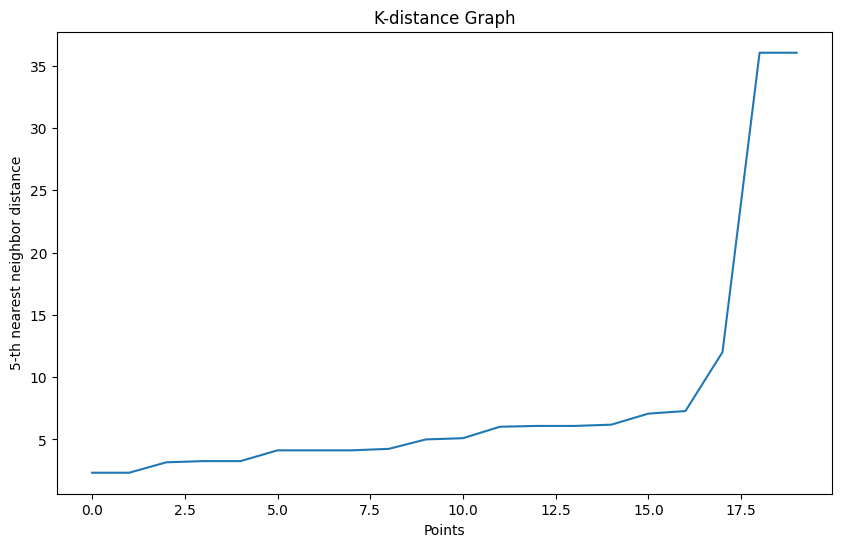

In [58]:
# Function to plot k-distance graph
from sklearn.neighbors import NearestNeighbors
import numpy as np


def plot_k_distance_graph(X, k):
    X = df[['Age', 'Education level']]
    
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

# Plot k-distance graph
plot_k_distance_graph(df[['Age', 'Education level']], k=5)

Clusters found: 2
Noise points: 5


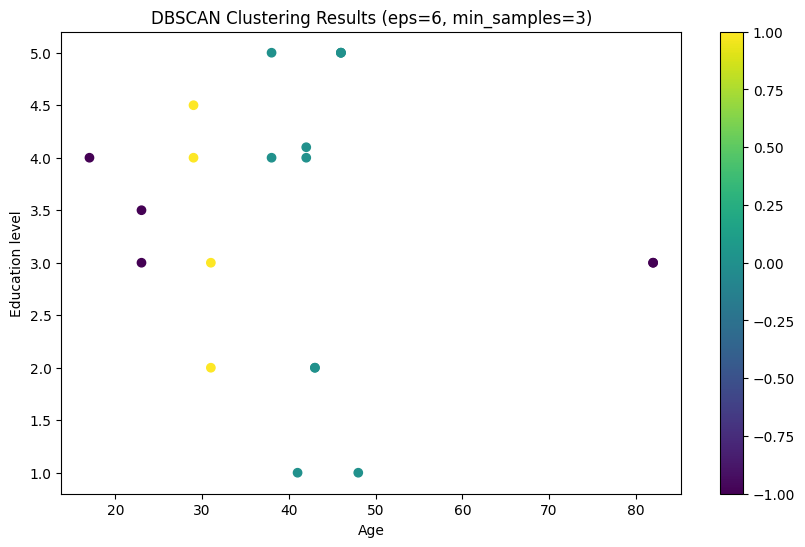

Clusters found: 2
Noise points: 2


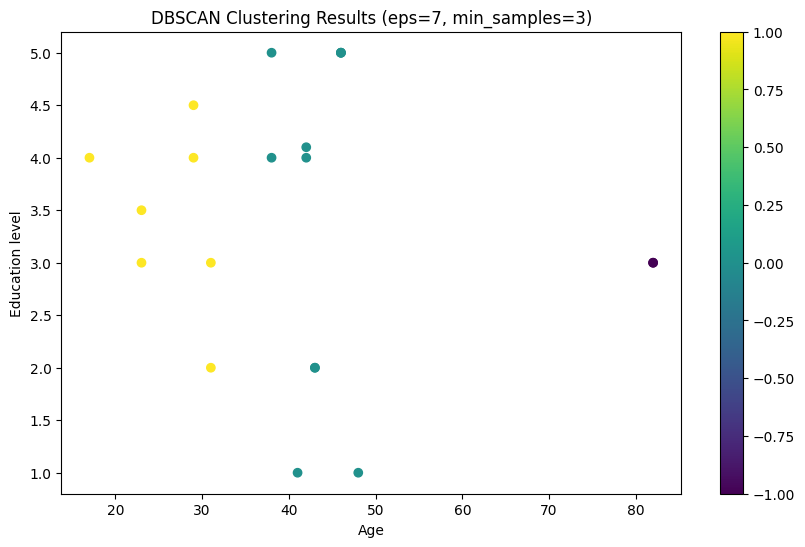

Clusters found: 1
Noise points: 2


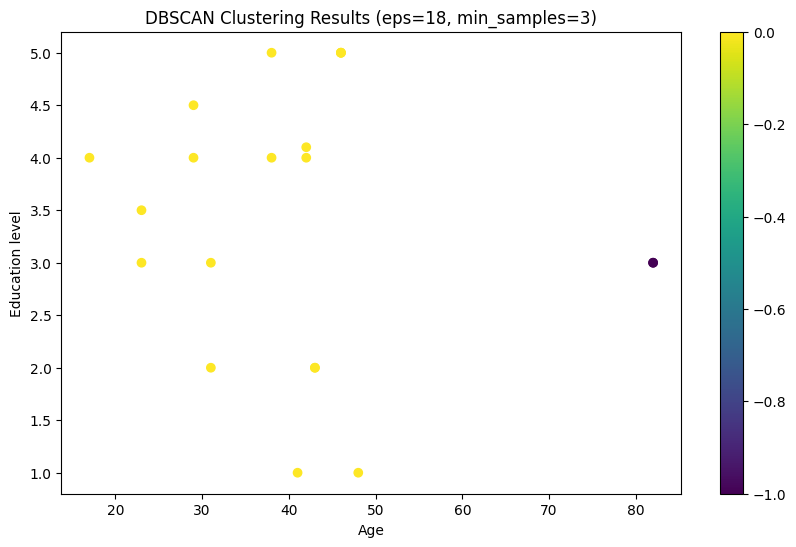

In [59]:
# Perform DBSCAN clustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X = df[['Age', 'Education level']]

def dbscan_clustering(epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Visualize the results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'DBSCAN Clustering Results (eps={epsilon}, min_samples={min_samples})')
    plt.xlabel('Age')
    plt.ylabel('Education level')
    
    # Mostrar estadístiques
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)
    print(f'Clusters found: {n_clusters}')
    print(f'Noise points: {n_noise}')
    
    plt.show()
    return clusters

# Prova amb diferents valors
clusters = dbscan_clustering(epsilon=6, min_samples=3)  
clusters = dbscan_clustering(epsilon=7, min_samples=3)  
clusters = dbscan_clustering(epsilon=18, min_samples=3)    

**Hierarchical clustering with Drendrograms**<br>
We can clearly see Lee as an outlier again.

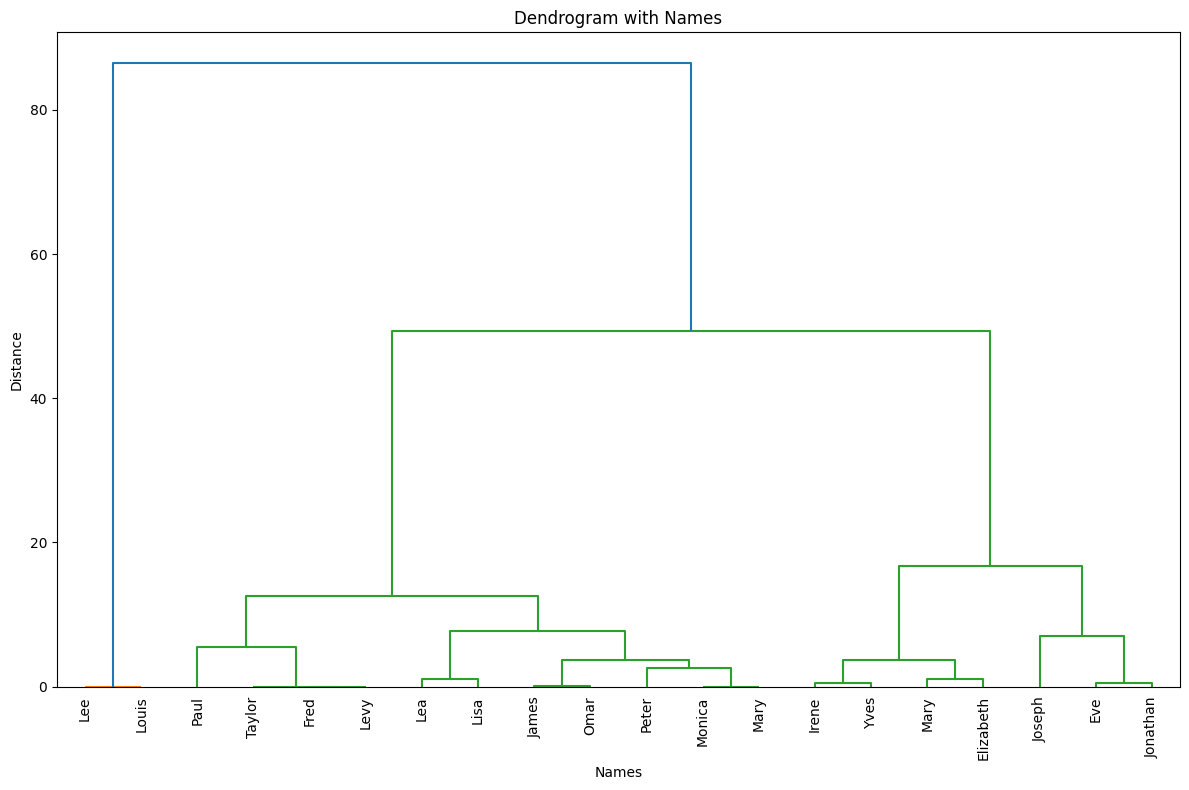

In [60]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Crear coordenades només amb les dades netes
coordinates = np.column_stack((df['Age'], df['Education level']))

# Hierarchical clustering
Z = linkage(coordinates, method='ward')

# Dendrograma AMB noms
plt.figure(figsize=(12, 8))
dendrogram(Z, 
           labels=df['Name'].values,  
           leaf_rotation=90, 
           leaf_font_size=10)
plt.title('Dendrogram with Names')
plt.xlabel('Names')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [61]:
import difflib

def edit_distance_difflib(s1, s2):
    """Calculate the edit distance using difflib"""
    matcher = difflib.SequenceMatcher(None, s1, s2)
    return len(s1) + len(s2) - 2 * sum(match.size for match in matcher.get_matching_blocks())

# Calculate edit distance between two strings
distance = edit_distance_difflib("composition", "conception")
print(f"Edit distance: {distance}")

Edit distance: 7


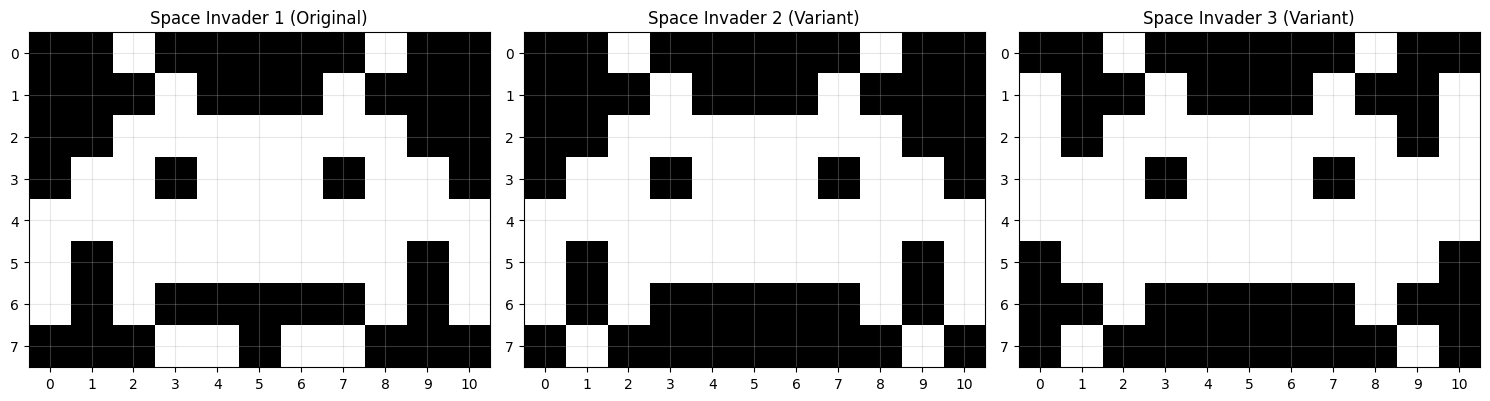

Dimensions dels vectors:
Vector 1: (88,)
Vector 2: (88,)
Vector 3: (88,)

Primers 20 valors de cada vector:
Vector 1: [0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
Vector 2: [0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
Vector 3: [0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0]

CÀLCUL DE DISTÀNCIES ENTRE SPACE INVADERS

1. DISTÀNCIA EUCLIDIANA:
   Invader 1 vs Invader 2: 2.4495
   Invader 1 vs Invader 3: 4.2426
   Invader 2 vs Invader 3: 3.4641

2. DISTÀNCIA MANHATTAN:
   Invader 1 vs Invader 2: 6
   Invader 1 vs Invader 3: 18
   Invader 2 vs Invader 3: 12

3. DISTÀNCIA HAMMING (nombre de píxels diferents):
   Invader 1 vs Invader 2: 6
   Invader 1 vs Invader 3: 18
   Invader 2 vs Invader 3: 12



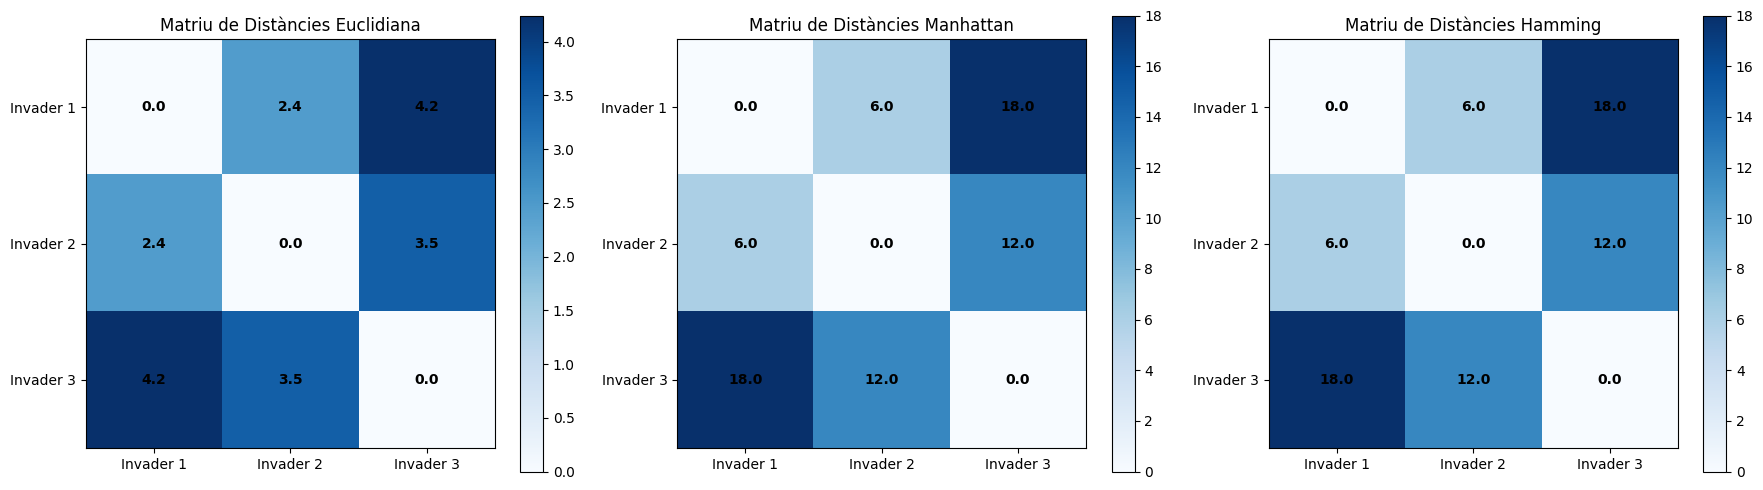

VERIFICACIÓ AMB IMPLEMENTACIONS MANUALS:

Distàncies calculades manualment (Invader 1 vs Invader 2):
Euclidiana manual: 2.4495
Manhattan manual:  6
Hamming manual:    6

ANÀLISI DE SIMILITUD:

Euclidean: El parell més similar és 1-2 amb distància 2.45
Manhattan: El parell més similar és 1-2 amb distància 6.00
Hamming: El parell més similar és 1-2 amb distància 6.00

INTERPRETACIÓ:
- Distàncies més petites indiquen major similitud
- La distància Hamming compta píxels diferents (més intuïtiva per imatges binàries)
- La distància Euclidiana dona més pes a les diferències grans
- La distància Manhattan suma les diferències absolutes


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, hamming, cityblock

# Representar les imatges de Space Invaders com a vectors binaris
# Basat en la imatge proporcionada, creem una representació binària
# 1 = píxel ple (gris), 0 = píxel buit (blanc)

def create_space_invader_1():
    """Space Invader original (basat en la imatge proporcionada)"""
    invader = np.array([
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
    ])
    return invader

def create_space_invader_2():
    """Variant del Space Invader (braços cap avall)"""
    invader = np.array([
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ])
    return invader

def create_space_invader_3():
    """Altra variant del Space Invader"""
    invader = np.array([
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ])
    return invader

# Crear les tres variants
invader1 = create_space_invader_1()
invader2 = create_space_invader_2()
invader3 = create_space_invader_3()

# Visualitzar les imatges
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(invader1, cmap='gray')
axes[0].set_title('Space Invader 1 (Original)')
axes[0].grid(True, alpha=0.3)

axes[1].imshow(invader2, cmap='gray')
axes[1].set_title('Space Invader 2 (Variant)')
axes[1].grid(True, alpha=0.3)

axes[2].imshow(invader3, cmap='gray')
axes[2].set_title('Space Invader 3 (Variant)')
axes[2].grid(True, alpha=0.3)

for ax in axes:
    ax.set_xticks(range(11))
    ax.set_yticks(range(8))

plt.tight_layout()
plt.show()

# Convertir les imatges 2D en vectors 1D (aplanar)
vector1 = invader1.flatten()
vector2 = invader2.flatten()
vector3 = invader3.flatten()

print("Dimensions dels vectors:")
print(f"Vector 1: {vector1.shape}")
print(f"Vector 2: {vector2.shape}")
print(f"Vector 3: {vector3.shape}")
print()

# Mostrar els primers valors dels vectors
print("Primers 20 valors de cada vector:")
print(f"Vector 1: {vector1[:20]}")
print(f"Vector 2: {vector2[:20]}")
print(f"Vector 3: {vector3[:20]}")
print()

# Funció per calcular distàncies
def calculate_distances(v1, v2, v3):
    """Calcula totes les distàncies entre tres vectors"""
    
    # Distàncies Euclidianes
    eucl_12 = euclidean(v1, v2)
    eucl_13 = euclidean(v1, v3)
    eucl_23 = euclidean(v2, v3)
    
    # Distàncies Manhattan (City Block)
    manh_12 = cityblock(v1, v2)
    manh_13 = cityblock(v1, v3)
    manh_23 = cityblock(v2, v3)
    
    # Distàncies Hamming
    hamm_12 = hamming(v1, v2) * len(v1)  # Multiplicar per la longitud per obtenir la distància absoluta
    hamm_13 = hamming(v1, v3) * len(v1)
    hamm_23 = hamming(v2, v3) * len(v1)
    
    return {
        'euclidean': [eucl_12, eucl_13, eucl_23],
        'manhattan': [manh_12, manh_13, manh_23],
        'hamming': [hamm_12, hamm_13, hamm_23]
    }

# Calcular totes les distàncies
distances = calculate_distances(vector1, vector2, vector3)

# Mostrar resultats
print("CÀLCUL DE DISTÀNCIES ENTRE SPACE INVADERS")
print("="*50)
print()

print("1. DISTÀNCIA EUCLIDIANA:")
print(f"   Invader 1 vs Invader 2: {distances['euclidean'][0]:.4f}")
print(f"   Invader 1 vs Invader 3: {distances['euclidean'][1]:.4f}")
print(f"   Invader 2 vs Invader 3: {distances['euclidean'][2]:.4f}")
print()

print("2. DISTÀNCIA MANHATTAN:")
print(f"   Invader 1 vs Invader 2: {distances['manhattan'][0]:.0f}")
print(f"   Invader 1 vs Invader 3: {distances['manhattan'][1]:.0f}")
print(f"   Invader 2 vs Invader 3: {distances['manhattan'][2]:.0f}")
print()

print("3. DISTÀNCIA HAMMING (nombre de píxels diferents):")
print(f"   Invader 1 vs Invader 2: {distances['hamming'][0]:.0f}")
print(f"   Invader 1 vs Invader 3: {distances['hamming'][1]:.0f}")
print(f"   Invader 2 vs Invader 3: {distances['hamming'][2]:.0f}")
print()

# Crear una matriu de distàncies
labels = ['Invader 1', 'Invader 2', 'Invader 3']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Matriu per cada mètrica
metrics = ['Euclidiana', 'Manhattan', 'Hamming']
metric_data = [distances['euclidean'], distances['manhattan'], distances['hamming']]

for i, (metric, data) in enumerate(zip(metrics, metric_data)):
    # Crear matriu simètrica
    matrix = np.array([
        [0, data[0], data[1]],
        [data[0], 0, data[2]],
        [data[1], data[2], 0]
    ])
    
    im = axes[i].imshow(matrix, cmap='Blues')
    axes[i].set_title(f'Matriu de Distàncies {metric}')
    axes[i].set_xticks(range(3))
    axes[i].set_yticks(range(3))
    axes[i].set_xticklabels(labels)
    axes[i].set_yticklabels(labels)
    
    # Afegir valors a les cel·les
    for row in range(3):
        for col in range(3):
            axes[i].text(col, row, f'{matrix[row, col]:.1f}', 
                        ha='center', va='center', fontweight='bold')
    
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

# Implementació manual per comparar
def manual_euclidean(v1, v2):
    """Implementació manual de la distància euclidiana"""
    return np.sqrt(np.sum((v1 - v2) ** 2))

def manual_manhattan(v1, v2):
    """Implementació manual de la distància Manhattan"""
    return np.sum(np.abs(v1 - v2))

def manual_hamming(v1, v2):
    """Implementació manual de la distància Hamming"""
    return np.sum(v1 != v2)

print("VERIFICACIÓ AMB IMPLEMENTACIONS MANUALS:")
print("="*50)
print()

print("Distàncies calculades manualment (Invader 1 vs Invader 2):")
print(f"Euclidiana manual: {manual_euclidean(vector1, vector2):.4f}")
print(f"Manhattan manual:  {manual_manhattan(vector1, vector2):.0f}")
print(f"Hamming manual:    {manual_hamming(vector1, vector2):.0f}")
print()

# Anàlisi de similitud
print("ANÀLISI DE SIMILITUD:")
print("="*30)
print()

# Trobar el parell més similar per cada mètrica
pairs = [('1-2', 0), ('1-3', 1), ('2-3', 2)]

for metric_name, metric_distances in distances.items():
    min_dist_idx = np.argmin(metric_distances)
    min_pair = pairs[min_dist_idx][0]
    min_dist = metric_distances[min_dist_idx]
    
    print(f"{metric_name.capitalize()}: El parell més similar és {min_pair} amb distància {min_dist:.2f}")

print()
print("INTERPRETACIÓ:")
print("- Distàncies més petites indiquen major similitud")
print("- La distància Hamming compta píxels diferents (més intuïtiva per imatges binàries)")
print("- La distància Euclidiana dona més pes a les diferències grans")
print("- La distància Manhattan suma les diferències absolutes")

**Bags of words and distance metrics**

TEXTOS ORIGINALS:

Text 1 (Technology):
Artificial intelligence is transforming the modern world rapidly. 
    Machine learning algorithms can process vast amounts of data efficiently. 
    Deep neural networks are revolutionizing computer vision and natural language processing.

Text 2 (Nature):
The forest ecosystem supports diverse wildlife populations throughout the year. 
    Birds migrate seasonally to find optimal feeding and nesting conditions. 
    Natural habitats provide essential resources for animal survival and reproduction.

Text 3 (Cooking):
Fresh ingredients are essential for creating delicious and healthy meals. 
    Professional chefs use various cooking techniques to enhance flavors naturally. 
    Good kitchen equipment helps prepare food efficiently and safely for everyone.


TEXTOS PREPROCESSATS:

Text 1 (Technology):
Paraules: ['artificial', 'intelligence', 'transforming', 'the', 'modern', 'world', 'rapidly', 'machine', 'learning', 'algorithms', 'can', 'process',

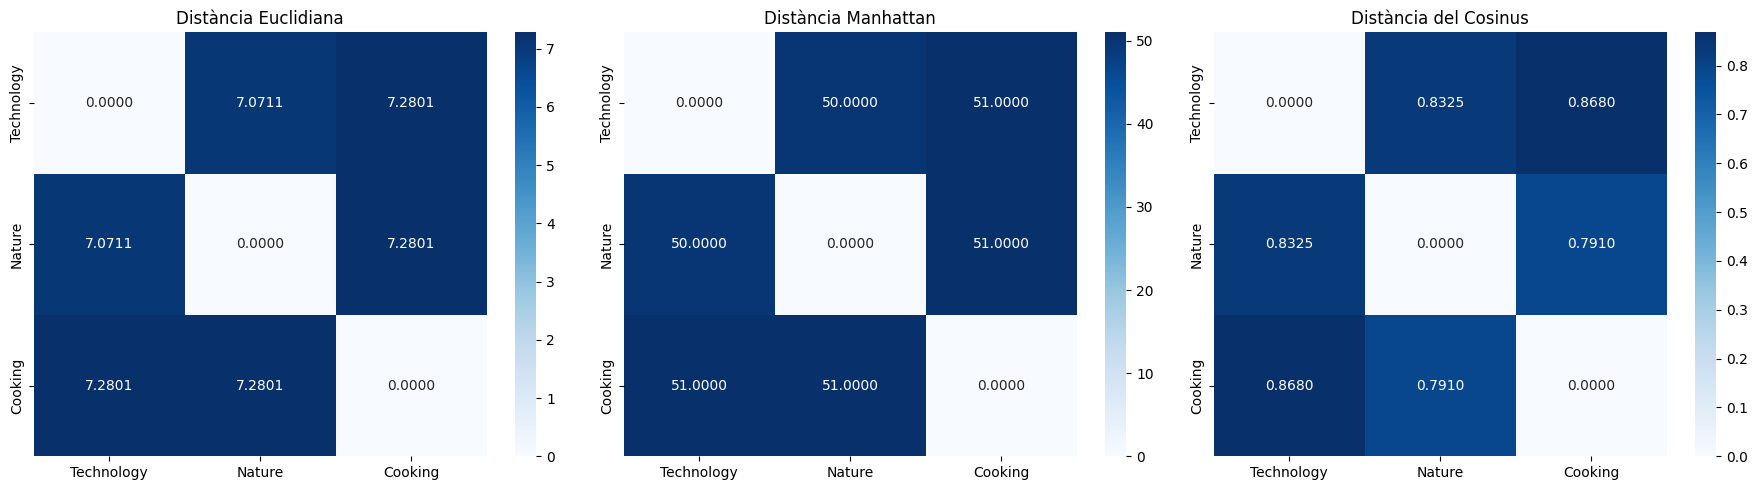



ANÀLISI DE SIMILITUD:

EUCLIDEAN:
  Més similars: 1 vs 2 (distància: 7.0711)
  Més diferents: 1 vs 3 (distància: 7.2801)

MANHATTAN:
  Més similars: 1 vs 2 (distància: 50.0000)
  Més diferents: 1 vs 3 (distància: 51.0000)

COSINE:
  Més similars: 2 vs 3 (distància: 0.7910)
  Més diferents: 1 vs 3 (distància: 0.8680)


ESTADÍSTIQUES DELS VECTORS:

Text 1 (Technology):
  Longitud del vector: 74
  Paraules úniques: 27
  Total paraules: 27
  Norma euclidiana: 5.1962

Text 2 (Nature):
  Longitud del vector: 74
  Paraules úniques: 27
  Total paraules: 29
  Norma euclidiana: 5.7446

Text 3 (Cooking):
  Longitud del vector: 74
  Paraules úniques: 28
  Total paraules: 30
  Norma euclidiana: 5.8310


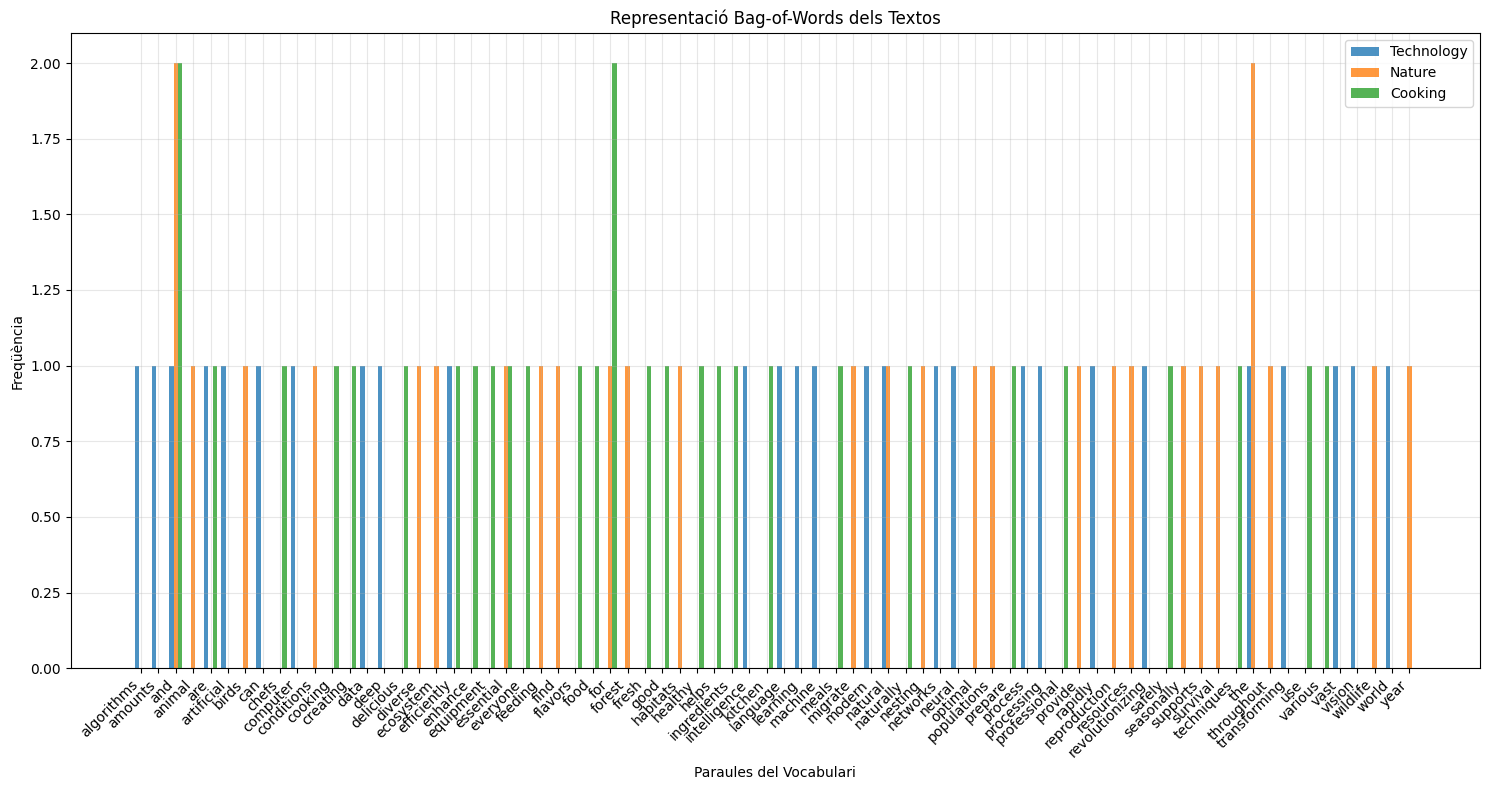



VERIFICACIÓ AMB IMPLEMENTACIONS MANUALS:
Technology vs Nature:
  Euclidiana manual: 7.0711
  Cosinus manual: 0.8325

INTERPRETACIÓ:
• Distàncies petites = textos més similars
• Distància del cosinus és millor per textos (invariant a la longitud)
• Bag-of-words ignora l'ordre de les paraules
• Paraules comunes indiquen similitud temàtica


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial.distance import euclidean, cosine, cityblock
import pandas as pd
import seaborn as sns

# Definir els tres textos
texts = {
    "Text 1 (Technology)": """
    Artificial intelligence is transforming the modern world rapidly. 
    Machine learning algorithms can process vast amounts of data efficiently. 
    Deep neural networks are revolutionizing computer vision and natural language processing.
    """,
    
    "Text 2 (Nature)": """
    The forest ecosystem supports diverse wildlife populations throughout the year. 
    Birds migrate seasonally to find optimal feeding and nesting conditions. 
    Natural habitats provide essential resources for animal survival and reproduction.
    """,
    
    "Text 3 (Cooking)": """
    Fresh ingredients are essential for creating delicious and healthy meals. 
    Professional chefs use various cooking techniques to enhance flavors naturally. 
    Good kitchen equipment helps prepare food efficiently and safely for everyone.
    """
}

# Funció per preprocessar text
def preprocess_text(text):
    """Neteja i preprocessa el text"""
    import re
    # Convertir a minúscules
    text = text.lower()
    # Eliminar puntuació i números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Dividir en paraules
    words = text.split()
    # Eliminar paraules molt curtes
    words = [word for word in words if len(word) > 2]
    return words

# Preprocessar tots els textos
processed_texts = {}
for name, text in texts.items():
    processed_texts[name] = preprocess_text(text)

print("TEXTOS ORIGINALS:")
print("="*50)
for name, text in texts.items():
    print(f"\n{name}:")
    print(text.strip())

print("\n\nTEXTOS PREPROCESSATS:")
print("="*50)
for name, words in processed_texts.items():
    print(f"\n{name}:")
    print(f"Paraules: {words}")
    print(f"Nombre de paraules: {len(words)}")

# Crear vocabulari global
all_words = []
for words in processed_texts.values():
    all_words.extend(words)

vocabulary = sorted(list(set(all_words)))
vocab_size = len(vocabulary)

print(f"\n\nVOCABULARI GLOBAL:")
print("="*30)
print(f"Mida del vocabulari: {vocab_size}")
print(f"Paraules: {vocabulary}")

# Crear diccionari paraula -> índex
word_to_index = {word: i for i, word in enumerate(vocabulary)}

# Funció per crear vector bag-of-words
def create_bow_vector(words, vocabulary, word_to_index):
    """Crea un vector bag-of-words"""
    vector = np.zeros(len(vocabulary))
    word_counts = Counter(words)
    
    for word, count in word_counts.items():
        if word in word_to_index:
            vector[word_to_index[word]] = count
    
    return vector

# Crear vectors bag-of-words per cada text
bow_vectors = {}
for name, words in processed_texts.items():
    bow_vectors[name] = create_bow_vector(words, vocabulary, word_to_index)

print(f"\n\nVECTORS BAG-OF-WORDS:")
print("="*40)

# Crear DataFrame per visualitzar millor
bow_df = pd.DataFrame(bow_vectors, index=vocabulary)
print(bow_df)

# Mostrar només paraules que apareixen en algun text
non_zero_words = bow_df.sum(axis=1) > 0
bow_df_filtered = bow_df[non_zero_words]

print(f"\n\nVECTORS FILTRATS (només paraules que apareixen):")
print("="*55)
print(bow_df_filtered)

# Calcular distàncies
def calculate_text_distances(vectors):
    """Calcula distàncies entre vectors de text"""
    text_names = list(vectors.keys())
    vector_list = list(vectors.values())
    
    distances = {
        'euclidean': {},
        'manhattan': {},
        'cosine': {}
    }
    
    for i in range(len(text_names)):
        for j in range(i+1, len(text_names)):
            name_i, name_j = text_names[i], text_names[j]
            pair_name = f"{name_i.split()[1]} vs {name_j.split()[1]}"
            
            # Distància Euclidiana
            distances['euclidean'][pair_name] = euclidean(vector_list[i], vector_list[j])
            
            # Distància Manhattan
            distances['manhattan'][pair_name] = cityblock(vector_list[i], vector_list[j])
            
            # Distància del Cosinus
            distances['cosine'][pair_name] = cosine(vector_list[i], vector_list[j])
    
    return distances

# Calcular totes les distàncies
distances = calculate_text_distances(bow_vectors)

print(f"\n\nDISTÀNCIES ENTRE TEXTOS:")
print("="*40)

for metric, pairs in distances.items():
    print(f"\n{metric.upper()}:")
    for pair, distance in pairs.items():
        print(f"  {pair}: {distance:.4f}")

# Crear matrius de distància per visualització
text_labels = ["Technology", "Nature", "Cooking"]
n_texts = len(text_labels)

# Crear matrius simètriques
euclidean_matrix = np.zeros((n_texts, n_texts))
manhattan_matrix = np.zeros((n_texts, n_texts))
cosine_matrix = np.zeros((n_texts, n_texts))

# Omplir matrius
pairs_mapping = [
    ((0, 1), "1 vs 2"),
    ((0, 2), "1 vs 3"), 
    ((1, 2), "2 vs 3")
]

for (i, j), pair_key in pairs_mapping:
    euclidean_matrix[i][j] = euclidean_matrix[j][i] = distances['euclidean'][pair_key]
    manhattan_matrix[i][j] = manhattan_matrix[j][i] = distances['manhattan'][pair_key]
    cosine_matrix[i][j] = cosine_matrix[j][i] = distances['cosine'][pair_key]

# Visualitzar matrius de distàncies
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

matrices = [euclidean_matrix, manhattan_matrix, cosine_matrix]
titles = ['Distància Euclidiana', 'Distància Manhattan', 'Distància del Cosinus']

for i, (matrix, title) in enumerate(zip(matrices, titles)):
    sns.heatmap(matrix, 
                annot=True, 
                fmt='.4f', 
                xticklabels=text_labels, 
                yticklabels=text_labels, 
                cmap='Blues', 
                ax=axes[i])
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

# Anàlisi de similitud
print(f"\n\nANÀLISI DE SIMILITUD:")
print("="*30)

for metric_name, metric_distances in distances.items():
    min_pair = min(metric_distances.items(), key=lambda x: x[1])
    max_pair = max(metric_distances.items(), key=lambda x: x[1])
    
    print(f"\n{metric_name.upper()}:")
    print(f"  Més similars: {min_pair[0]} (distància: {min_pair[1]:.4f})")
    print(f"  Més diferents: {max_pair[0]} (distància: {max_pair[1]:.4f})")

# Estadístiques dels vectors
print(f"\n\nESTADÍSTIQUES DELS VECTORS:")
print("="*35)

for name, vector in bow_vectors.items():
    print(f"\n{name}:")
    print(f"  Longitud del vector: {len(vector)}")
    print(f"  Paraules úniques: {np.count_nonzero(vector)}")
    print(f"  Total paraules: {int(np.sum(vector))}")
    print(f"  Norma euclidiana: {np.linalg.norm(vector):.4f}")

# Crear gràfic de barres amb freqüències
fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(vocabulary))
width = 0.25

bars1 = ax.bar(x - width, bow_df_filtered.iloc[:, 0], width, label=text_labels[0], alpha=0.8)
bars2 = ax.bar(x, bow_df_filtered.iloc[:, 1], width, label=text_labels[1], alpha=0.8)
bars3 = ax.bar(x + width, bow_df_filtered.iloc[:, 2], width, label=text_labels[2], alpha=0.8)

ax.set_xlabel('Paraules del Vocabulari')
ax.set_ylabel('Freqüència')
ax.set_title('Representació Bag-of-Words dels Textos')
ax.set_xticks(x)
ax.set_xticklabels(bow_df_filtered.index, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Implementació manual per verificar
def manual_euclidean_distance(v1, v2):
    """Implementació manual de distància euclidiana"""
    return np.sqrt(np.sum((v1 - v2) ** 2))

def manual_cosine_distance(v1, v2):
    """Implementació manual de distància del cosinus"""
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    
    if norm_v1 == 0 or norm_v2 == 0:
        return 1.0
    
    cosine_similarity = dot_product / (norm_v1 * norm_v2)
    return 1 - cosine_similarity

print(f"\n\nVERIFICACIÓ AMB IMPLEMENTACIONS MANUALS:")
print("="*50)

v1, v2, v3 = list(bow_vectors.values())

print("Technology vs Nature:")
print(f"  Euclidiana manual: {manual_euclidean_distance(v1, v2):.4f}")
print(f"  Cosinus manual: {manual_cosine_distance(v1, v2):.4f}")

print(f"\nINTERPRETACIÓ:")
print("="*20)
print("• Distàncies petites = textos més similars")
print("• Distància del cosinus és millor per textos (invariant a la longitud)")
print("• Bag-of-words ignora l'ordre de les paraules")
print("• Paraules comunes indiquen similitud temàtica")